In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csv_results/result_7.csv')
df

,seed,True,ARMA,Informer,Informer_para,RNN
0,68,"[-2.485083915460492, -2.5769433457135267, -0.5...","[-0.9208060317839213, -1.5265337012331037, -1....","[-0.4290483, 0.7428262, 0.26497313, 0.17436193...","(10, 2)","[-1.1231012344360352, -1.484511137008667, -1.0..."
1,12,"[-0.5665367880497909, 1.1403017394872068, 0.57...","[-0.6552178562071084, -1.0754161444789725, 0.8...","[-0.62291634, -0.22897546, -1.0901338, -0.5280...","(20, 4)","[-0.2788023054599762, -0.4547991454601288, 1.0..."
2,27,"[0.5433834014821325, -0.2813752169572461, -1.6...","[0.5743737551420518, 0.14440912969146297, -0.4...","[-1.5066259, -0.19593632, 2.2029326, 0.8301718...","(10, 2)","[0.6659502983093262, 0.13859495520591736, -0.3..."
3,32,"[0.8919009554410655, 0.3430863057232868, -0.83...","[1.0708670033078274, 0.045295010634492594, 0.0...","[-0.9224558, -0.5854201, -1.2823286, -1.331693...","(50, 10)","[1.1683357954025269, 0.1769324094057083, 0.032..."
4,83,"[-0.6545817741299405, 1.434024738276674, 0.347...","[-0.522174457218974, 0.27622257475845047, 1.34...","[1.0541668, 0.54815346, 1.4565058, 0.92990434,...","(10, 2)","[-0.6320043206214905, 0.4062245488166809, 1.31..."
...,...,...,...,...,...,...
95,49,"[2.14139299167754, 0.737526324612608, -2.69559...","[0.8043065297502421, 1.3395788166162892, -0.27...","[-0.79005474, 1.91065, 1.2099309, 0.88153136, ...","(20, 4)","[0.7484523057937622, 1.170014500617981, -0.510..."
96,56,"[1.1277697917032894, -0.6167016375988958, -2.2...","[1.4932332608483412, -0.1504634607184563, -0.7...","[-0.3967076, -0.3967902, 1.0225534, 1.3150758,...","(50, 10)","[1.4747065305709839, -0.11693251132965088, -0...."
97,91,"[-1.1289669884288405, -0.3500837920234936, 0.3...","[-0.7757707519459813, -0.6065385173319822, 0.1...","[0.2616677, -0.4963851, 0.88512737, 1.307374, ...","(10, 2)","[-0.718368649482727, -0.5472328662872314, 0.38..."
98,47,"[-1.7111665383308072, -1.3271955440327867, -0....","[-0.7075626129649617, -1.2383178577387128, -0....","[0.2503909, 2.0234058, 1.6973772, -0.070850626...","(50, 10)","[-0.5359579920768738, -1.253645658493042, -0.1..."


In [3]:
arma_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [4]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

KeyError: 'Informer_lr'

In [5]:
informer_lr_select

NameError: name 'informer_lr_select' is not defined

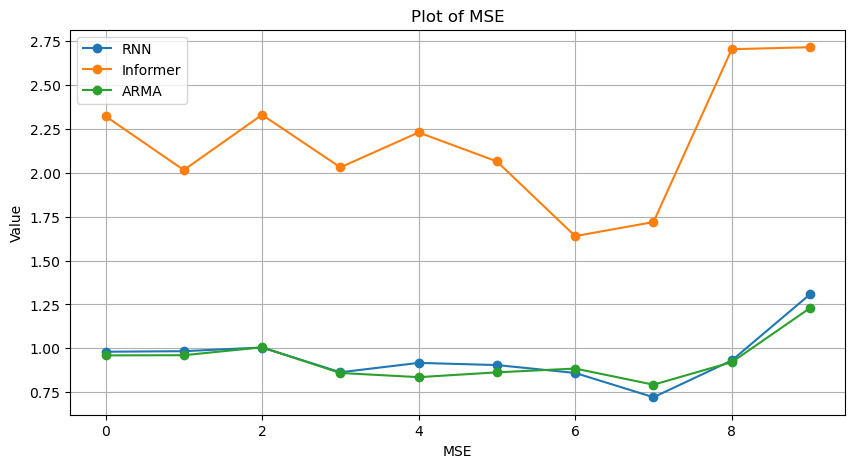

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


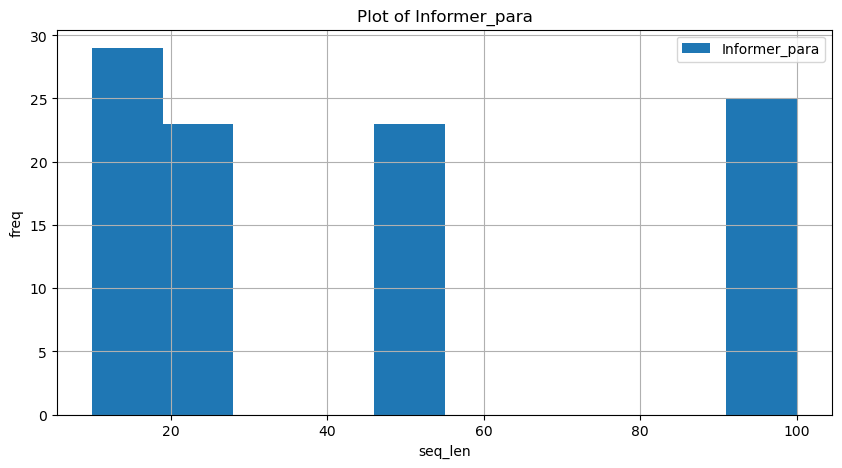

In [8]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

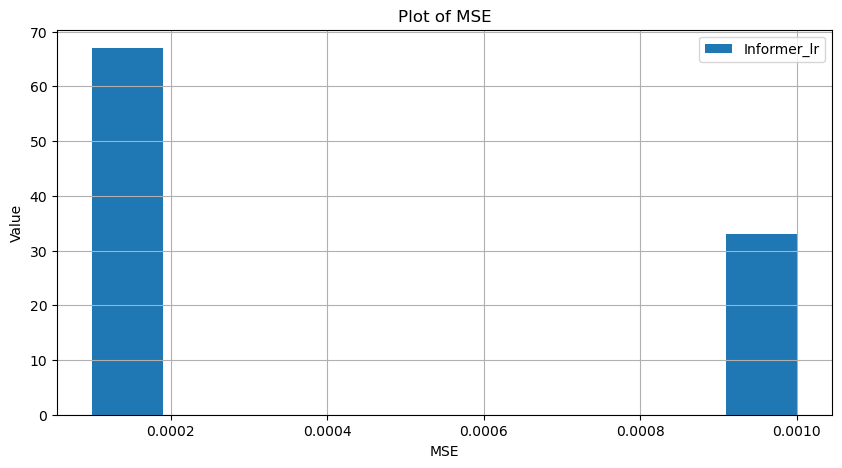

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()